# make sequential map

This tutorial is going to make a map with a grid-shape polygon shapefile that has two column name "tweets" and "usercount", which contained the number of tweets and number of users of each cell. 

The grids are the 500mx500m grids that cover the Tokyo 23 special wards.

In this tutorials, the following functions will be covered:

1. mpoly.prepare_map: for preparing the matplotlib figures+ax for drawing map (equal aspect, geometry context, background...)
2. mpoly.map_shape: simply map the shape of the polygon in the shapefile (just like what you get when you add a layer into qgis/arcmap)
3. mpoly.map_sequence: map a column with the numeric values of each polygon
4. mpoly.map_sequence with different break methods: use different types of break method, e.g. natural breaks...
5. mpoly.map_sequence with different colormap: use different types of color maps, and the reverse version
6. mpoly.map_sequence with manual break values: use the user defined break values
7. customizing map layout: xlim, ylim, legend location, background colour.
8. mpoly.add_scalebar: add a simple scalebar


## Start mapping (preparation)

First, import things that is needed for the following steps.

In [1]:
import geopandas as gpd # for reading and manupulating shapefile
import matplotlib.pyplot as plt # for making figure

import colouringmap.mapping_polygon as mpoly # for making maps

# magic line for matlotlib figure to be shown inline in jupyter cell
%matplotlib inline 

In [2]:
from palettable.colorbrewer.qualitative import Dark2_7 # to get the colormap for more custom manupulation in the last step

Second, read the file, and take a look on the attribute table of the shapefile.

In [3]:
grid_res = gpd.read_file('data/community_results.shp')
grid_res.head()

,com,geometry,node,tweets,usercount,xcor,ycor
0,14,"POLYGON ((175239.9457184017 3947195.841823581,...",0,1,1,139.939807,35.640542
1,56,"POLYGON ((175239.9457767347 3947695.841815081,...",1,0,0,139.939919,35.645048
2,1,"POLYGON ((142239.9457464929 3956695.841823446,...",10,35,21,139.576848,35.731640
3,18,"POLYGON ((144239.9457266586 3959695.841818351,...",100,40,32,139.599535,35.758373
4,4,"POLYGON ((154239.9457194024 3947195.841822605,...",1000,1898,660,139.707733,35.644166


Then, start playing with the shapefile. 
The following show how to prepare the figure before drawing the map on the figure.

The first line in the following cell is just a standard way to create a matplotlib figure, along with an "ax".  
The second line prepare the "ax" for mapping things. Setting map_context to the context of the shapefile is to 
make sure the shapefile is within the figure, so it will be shown within the figure.

The figure is just a matplotlib figure & ax, so you can also set the map context manually by something like this: 

    ax.set_xlim([minx, maxx])
    ax.set_ylim([miny, maxy])
    

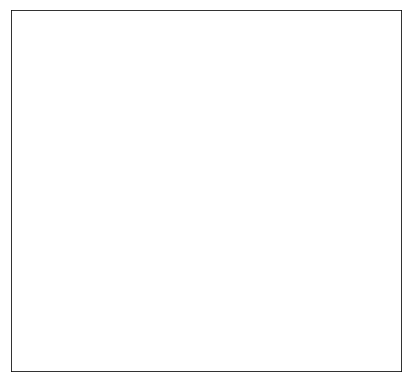

In [4]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)

The following show how to create a map with just the shape of the polygons with a same colour. 

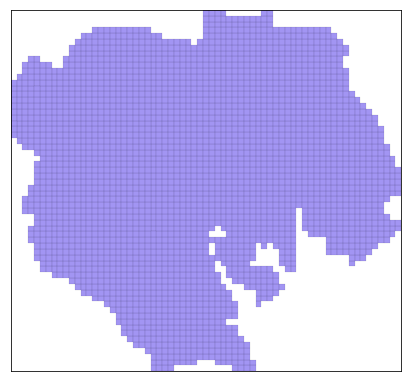

In [5]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_shape(grid_res, ax, lw=.1, alpha=.7)

The above is all basic operations. 

The following for mapping a column of a variable named "tweets". (actually this is the number of twitter tweets in the grid cell)

## map the polygons with colours according to a numeric column

Next, lets try to map the 'tweets' column with default colormap.

use mpoly.map_sequence function, throw in the geopandas gdf, the column name, and the ax.

other settings just leave them out, use the default.

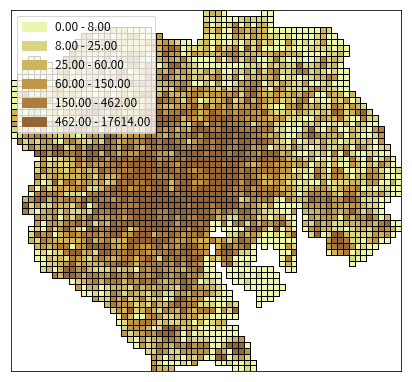

In [6]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax) 

The resulting map is not so good. 

The mpoly.map_sequence need at least three parameter: gdf, a column name(numeric), and a ax.
The other settings are optional, which default settings can be found in the following:

    mpoly.map_sequence(gdf, colorbysequence, ax, break_method='quantile', break_N=6, break_cuts=[], break_vmin=None, break_vmax=None, color_group='cmocean_sequential', color_name='Turbid_10', reverse=False, lw=1., ec='#000000', alpha=1., zorder=1, extend_context=True, add_legend=True, font_path=None, legend_loc='upper left', legend_format='%.2f')
    
break them down:
- break_method='quantile', break_N=6, break_cuts=[], break_vmin=None, break_vmax=None: these are used to break the vector into levels;
- color_group='cmocean_sequential', color_name='Turbid_10', reverse=False: these are used to colour the levels;
- lw=1., ec='#000000', alpha=1., zorder=1: these are some basic maplotlib patches config, for drawing;
- extend_context=True: these tell the map to extend the mapping area to the gdf size, or not(use the prepare_map context);
- add_legend=True, font_path=None, legend_loc='upper left', legend_format='%.2f': for formatting the legend.

### with different breaking methods

The following show different types of break_method. To make the map better looking, the edge color (ec) is set to white, and the edge line-width (lw) is set to 0.2. 

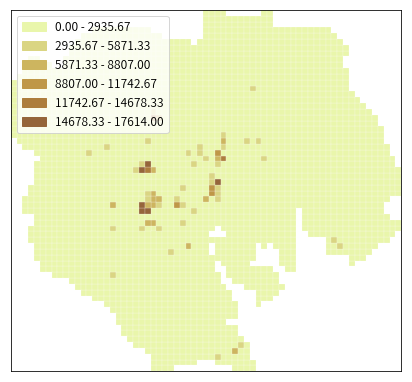

In [7]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, break_method='equal_interval', ec='w', lw=.2) 

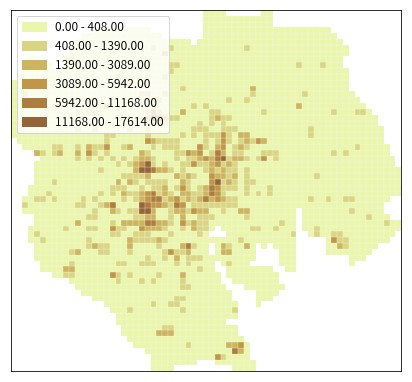

In [8]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, break_method='natural_break', ec='w', lw=.2) 

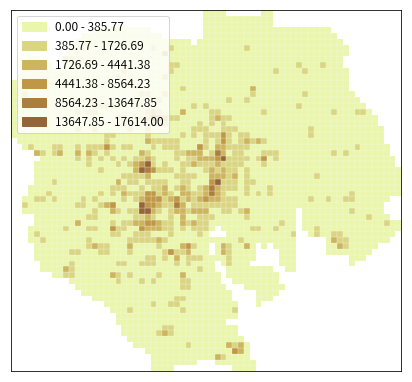

In [9]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, break_method='head_tail_break', ec='w', lw=.2) 

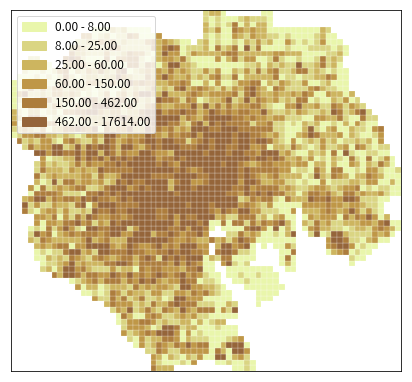

In [10]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, break_method='quantile', ec='w', lw=.2) 

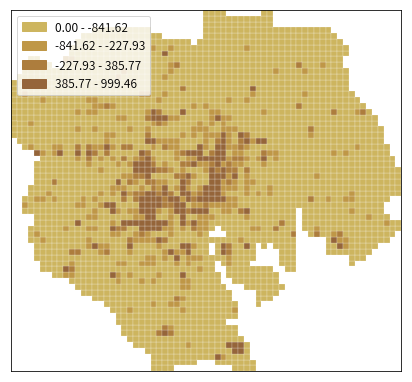

In [11]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, break_method='standard_deviation', ec='w', lw=.2) # experiment, advise not to use


the break_method include: natural_break, quantile, head_tail_break, standard_deviation. The result of standard_deviation may be weird if the vector does not follow a normal distribution.

The following use head_tail break, and increase the number of levels to 7. 

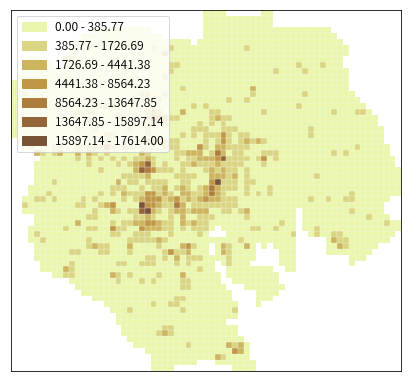

In [12]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, break_method='head_tail_break', break_N=7, ec='w', lw=.2) 

### with different colormap

Lets' try some different colour. 

colouringmap use palettable's colormap, so the available colormap in palettable should be useable in colouringmap. 

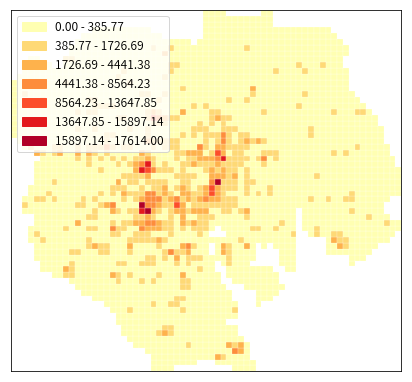

In [13]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, 
                        break_method='head_tail_break', break_N=7, 
                        ec='w', lw=.2, 
                        color_group='colorbrewer_sequential', color_name='YlOrRd_7') 

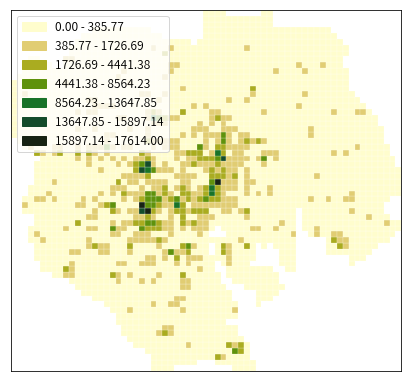

In [14]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, 
                        break_method='head_tail_break', break_N=7, 
                        ec='w', lw=.2, 
                        color_group='cmocean_sequential', color_name='Speed_7') 

try the reverse colormap

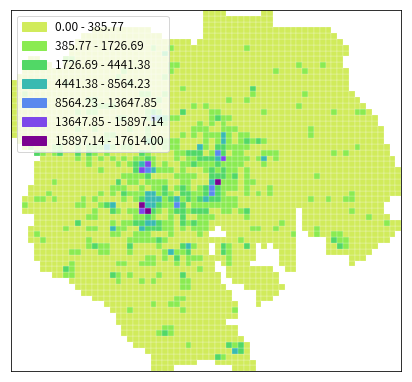

In [15]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, 
                        break_method='head_tail_break', break_N=7, 
                        ec='w', lw=.2, 
                        color_group='mycarta', color_name='CubeYF_7', reverse=True) 

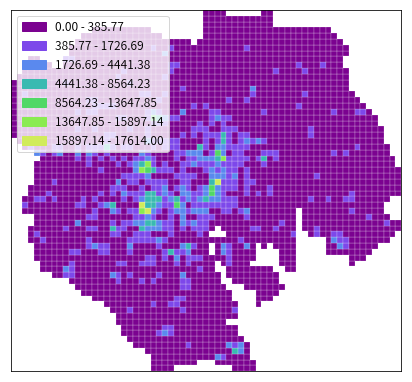

In [16]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, 
                        break_method='head_tail_break', break_N=7, 
                        ec='w', lw=.2, 
                        color_group='mycarta', color_name='CubeYF_7', reverse=False) 

!!!
number of colour is less then number of category
colours will be repeating
!!!


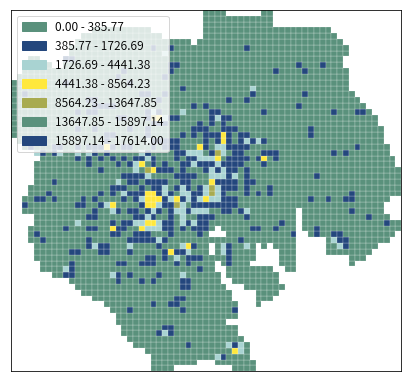

In [20]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, 
                        break_method='head_tail_break', break_N=7, 
                        ec='w', lw=.2, 
                        color_group='wesanderson', color_name='darjeeling3', reverse=True) 

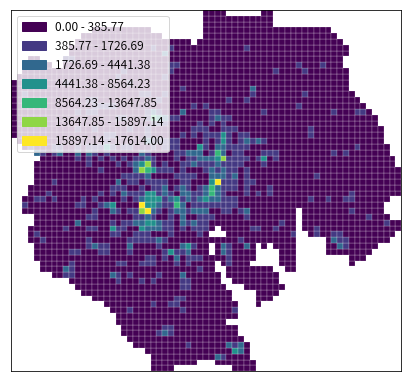

In [21]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, 
                        break_method='head_tail_break', break_N=7, 
                        ec='w', lw=.2, 
                        color_group='matplotlib', color_name='Viridis_7', reverse=False) 

### customize the break values to some simple numbers

The breaks result is usually complex, as they are calculated based on some rules. But sometimes, we want to make a map that the break values is simpler, such as round to hundreds, etc. So, after we tried some breaking methods, and found some nice breaking results, then we can manually round the numbers to the nearby hundreds values (or the ceiling or floor values). 


The following use the manual break values method, with a parameter named "break_cuts" to make the breaks into some prefered break methods; 

and change the location of the legend to the lower right

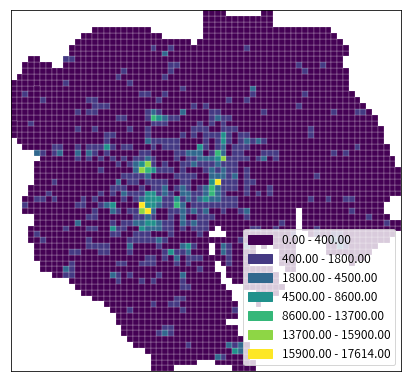

In [23]:
fig,ax = plt.subplots(figsize=(7,7))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, 
                        break_method='manual', break_cuts=[400,1800,4500,8600,13700,15900], 
                        ec='w', lw=.2, 
                        color_group='matplotlib', color_name='Viridis_7',
                       legend_loc='lower right') 

## customizing the map layout

The legend in the previous map is overlapped on the map, so it is better to extend the map context to include more spaces.

In the following map, the figure size is larger, and the map context (xlim, ylim) is also increased. (just change them as a normal matplotlib ax element)

142239.945726 175739.945801 3935195.84181 3966195.84182


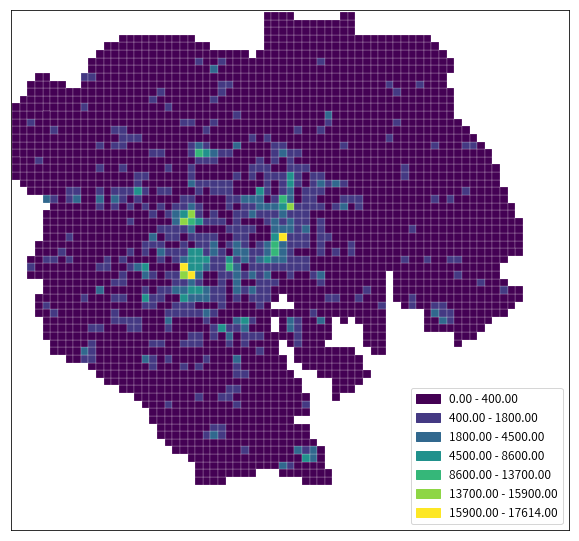

In [44]:
fig,ax = plt.subplots(figsize=(10,10))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, 
                        break_method='manual', break_cuts=[400,1800,4500,8600,13700,15900], 
                        ec='w', lw=.2, 
                        color_group='matplotlib', color_name='Viridis_7', 
                       legend_loc='lower right', extend_context=False) 

x0,x1 = ax.get_xlim()
ax.set_xlim([x0-100, x1+3000])
y0,y1 = ax.get_ylim()
ax.set_ylim([y0-3000, y1+100])
#print x0,x1, y0,y1

### adding border

The map looks better now. 

But, it would be better if we also map the administrative boundaries to the map, to show which colour belong to which area. So lets add the boundary shapefile.

The following read the administrative boundary of the Tokyo 23 special wards.

In [46]:
borders = gpd.read_file('data/tokyo_special_ward.shp')
borders.head()

,CC_1,CC_2,ENGTYPE4,ENGTYPE_1,ENGTYPE_2,ENGTYPE_3,ENGTYPE_4,ENGTYPE_5,HASC_1,HASC_2,...,VALIDFR_4,VALIDTO_1,VALIDTO_2,VALIDTO_3,VALIDTO_4,VARNAME_1,VARNAME_2,VARNAME_3,VARNAME_4,geometry
0,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,(POLYGON ((139.7594604492192 35.61920547485357...
1,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,"(POLYGON ((139.756988525391 35.61753082275391,..."
2,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,"POLYGON ((139.6250152587891 35.76376342773449,..."
3,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,"POLYGON ((139.6917114257814 35.68527603149425,..."
4,None,None,None,Metropolis,Special Ward,None,None,None,JP.TK,None,...,None,Unknown,Present,None,Unknown,Edo|Yedo|Tokio|T┼uio,None,None,None,"(POLYGON ((139.7405700683598 35.5415992736817,..."


Before we map the boundaries to the map, lets check if the two shapefile have the same projection. 

In [47]:
print borders.crs==grid_res.crs # check if the two shapefile have the same projection
print borders.crs # check the two projections
print grid_res.crs 

False
{'init': u'epsg:4326'}
{u'lon_0': 138, u'ellps': u'WGS84', u'y_0': 0, u'no_defs': True, u'proj': u'eqdc', u'x_0': 0, u'units': u'm', u'lat_2': 40, u'lat_1': 34, u'lat_0': 0}


Turns out they are not same, so lets do some projection.

In [48]:
borders = borders.to_crs(grid_res.crs) # convert the borders projection to the same as the grid_res
print borders.crs==grid_res.crs # now check again if the two shapefile have the same projection

True


So they are now in the same projection.

Now, lets add the administrative boundaries to the map.  
Because the boundaries are set to white colour (ec='w'), so the grid edge colour is changed to white (ec='w')

(3932195.8418149902, 3966295.8418229963)

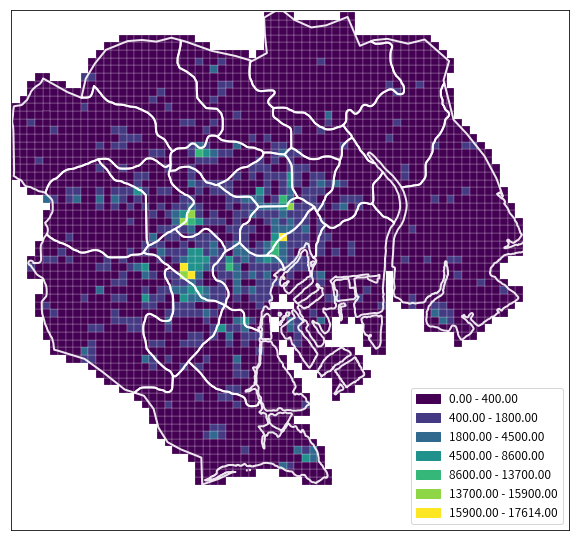

In [54]:
fig,ax = plt.subplots(figsize=(10,10))
ax = mpoly.prepare_map(ax, map_context=grid_res)
ax = mpoly.map_sequence(grid_res, 'tweets', ax, 
                        break_method='manual', break_cuts=[400,1800,4500,8600,13700,15900], 
                        ec='w', lw=.2, 
                        color_group='matplotlib', color_name='Viridis_7', 
                       legend_loc='lower right', extend_context=False) 
ax = mpoly.add_border(borders, ax, ec='w', lw=2, alpha=.9)

x0,x1 = ax.get_xlim()
ax.set_xlim([x0-100, x1+3000])
y0,y1 = ax.get_ylim()
ax.set_ylim([y0-3000, y1+100])
#print x0,x1, y0,y1

let try something else:

- change the background_colour in the prepare_map() to something dark
- remove the linewidth of the grids to 0.0
- reduce the linewidth of the borders to 0.5


(3932195.8418149902, 3966695.8418229963)

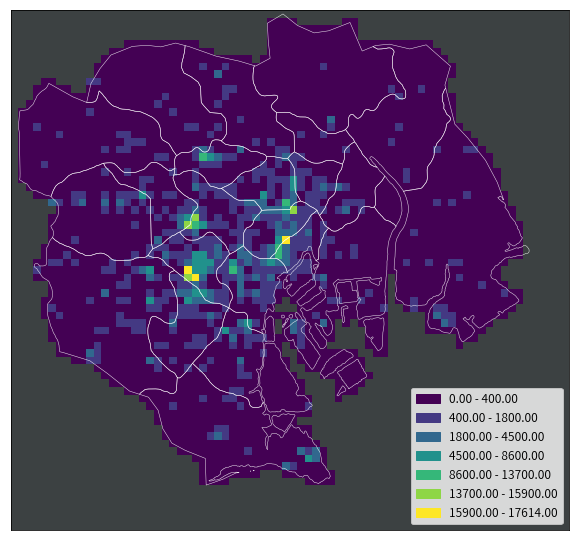

In [72]:
fig,ax = plt.subplots(figsize=(10,10))
ax = mpoly.prepare_map(ax, map_context=grid_res, background_colour='#3c4142')
ax = mpoly.map_sequence(grid_res, 'tweets', ax, 
                        break_method='manual', break_cuts=[400,1800,4500,8600,13700,15900], 
                        ec='w', lw=.0, 
                        color_group='matplotlib', color_name='Viridis_7', 
                       legend_loc='lower right', extend_context=False) 
ax = mpoly.add_border(borders, ax, ec='w', lw=.5, alpha=.9)


x0,x1 = ax.get_xlim()
ax.set_xlim([x0-500, x1+3000])
y0,y1 = ax.get_ylim()
ax.set_ylim([y0-3000, y1+500])
#print x0,x1, y0,y1

### add map scale bar (experimenting)

The following add a simple scalebar to the map, using the mpoly.add_scalebar() function.

(3932195.8418149902, 3966695.8418229963)

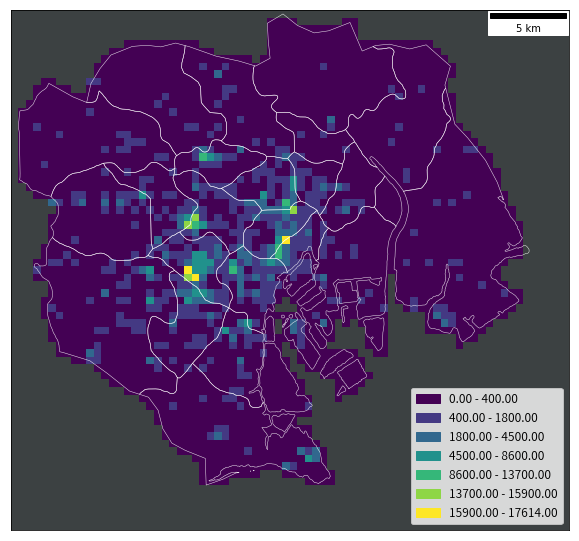

In [74]:

fig,ax = plt.subplots(figsize=(10,10))
ax = mpoly.prepare_map(ax, map_context=grid_res, background_colour='#3c4142')
ax = mpoly.map_sequence(grid_res, 'tweets', ax, 
                        break_method='manual', break_cuts=[400,1800,4500,8600,13700,15900], 
                        ec='w', lw=.0, 
                        color_group='matplotlib', color_name='Viridis_7', 
                       legend_loc='lower right', extend_context=False) 
ax = mpoly.add_border(borders, ax, ec='w', lw=.5, alpha=.9)
ax = mpoly.add_scalebar(ax)

x0,x1 = ax.get_xlim()
ax.set_xlim([x0-500, x1+3000])
y0,y1 = ax.get_ylim()
ax.set_ylim([y0-3000, y1+500])
#print x0,x1, y0,y1


the scalebar is OK in most situation, but if you need to make more customization, please use the matplotlib_scalebar directly (which is used by the colouringmap). 

The matplotlib-scalebar url:
https://pypi.python.org/pypi/matplotlib-scalebar

The following show how to customize the scalebar directly using matplotlib-scalebar.

note that the first value of the Scalebar is 1, meaning 1 pixel = 1 meter. 

In [75]:
from matplotlib_scalebar.scalebar import ScaleBar

(3932195.8418149902, 3966695.8418229963)

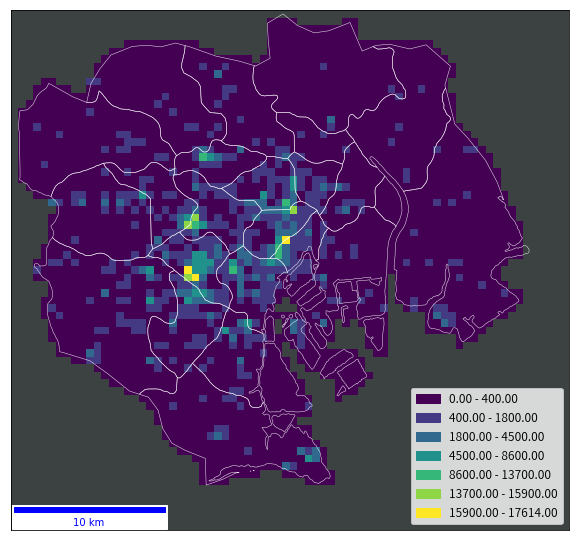

In [83]:

fig,ax = plt.subplots(figsize=(10,10))
ax = mpoly.prepare_map(ax, map_context=grid_res, background_colour='#3c4142')
ax = mpoly.map_sequence(grid_res, 'tweets', ax, 
                        break_method='manual', break_cuts=[400,1800,4500,8600,13700,15900], 
                        ec='w', lw=.0, 
                        color_group='matplotlib', color_name='Viridis_7', 
                       legend_loc='lower right', extend_context=False) 
ax = mpoly.add_border(borders, ax, ec='w', lw=.5, alpha=.9)
#ax = mpoly.add_scalebar(ax)
scalebar = ScaleBar(1, fixed_value=10, fixed_units='km',location='lower left', color='blue') # 1 pixel = 1 meter
ax.add_artist(scalebar)

x0,x1 = ax.get_xlim()
ax.set_xlim([x0-500, x1+3000])
y0,y1 = ax.get_ylim()
ax.set_ylim([y0-3000, y1+500])
#print x0,x1, y0,y1


I think the result now is quite nice~ (for the tutorials)

It can be better if you give the settings of the colour groups/colour name / bacgkround colour / lines ... more tries, and find the prefered designset of yours. 

That is all in this tutorial.